# Analyse: comparison between liver cells and  HepG2 cells (human liver cancer cells)


#### HepG2 
HepG2 is a human liver cancer cell line. Hep G2 is an immortal cell line which was derived in 1975 from the liver tissue of a 15-year-old Caucasian male from Argentina with a well-differentiated hepatocellular carcinoma. These cells are epithelial in morphology, have a modal chromosome number of 55, and are not tumorigenic in nude mice. 

In [1]:
from tfcomb import CombObj
genome_path="../testdaten/hg19_masked.fa"
motif_path="../testdaten/HOCOMOCOv11_HUMAN_motifs.txt"
result_path="./results/"

Using saved objects from market basket analysis from pkl files for liver and hepG2 cells using complete results of TF. Saving results from market basket analysis in objects. 

In [2]:
liver_object= CombObj().from_pickle(f"{result_path}Liver_enhancers_complete.pkl")
liver_object.prefix = "liver"

hepG2_object = CombObj().from_pickle(f"{result_path}HepG2_enhancers_complete.pkl")
hepG2_object.prefix = "HepG2"


Showing found rules of TF in each cell line

In [3]:
print(f"liver: {liver_object}")
print(f"HepG2: {hepG2_object}")

liver: <CombObj: 92371 TFBS (401 unique names) | Market basket analysis: 156517 rules>
HepG2: <CombObj: 1526600 TFBS (401 unique names) | Market basket analysis: 160799 rules>


Comparing rules of TF of cell line objects

In [4]:
compare_objliver_hepG2 = liver_object.compare(hepG2_object)

INFO: Calculating foldchange for contrast: liver / HepG2
INFO: The calculated log2fc's are found in the rules table (<DiffCombObj>.rules)


## Results Differential analysis of liver and hepG2

Results of differential analysis are found in compare_objCD4_CD8.rules. The table shows the rules of TF that distinguish strongly in occurence. The duplicates in the results are removed with simplify rules

In [5]:
compare_objliver_hepG2.simplify_rules()
compare_objliver_hepG2.rules

,TF1,TF2,liver_cosine,HepG2_cosine,liver/HepG2_cosine_log2fc,liver/HepG2_cosine_log2fc_pvalue
MEF2C-DUX4,MEF2C,DUX4,0.011560,0.102632,-1.450135,0.000000
ZNF768-PGR,ZNF768,PGR,0.007056,0.088487,-1.429801,0.000000
NANOG-HOXA10,NANOG,HOXA10,0.015192,0.107820,-1.404945,0.000000
POU5F1-HOXA10,POU5F1,HOXA10,0.016514,0.100712,-1.300805,0.000000
AR-NR1I2,AR,NR1I2,0.007729,0.076179,-1.265652,0.000000
...,...,...,...,...,...,...
HINFP-THAP11,HINFP,THAP11,0.129410,0.024502,1.379230,0.000062
ATF1-EPAS1,ATF1,EPAS1,0.090496,0.009537,1.379406,0.000473
ATF1-ARNT,ATF1,ARNT,0.085640,0.007525,1.383731,0.000324
ATF1-ATF6,ATF1,ATF6,0.130429,0.023420,1.411862,0.000102


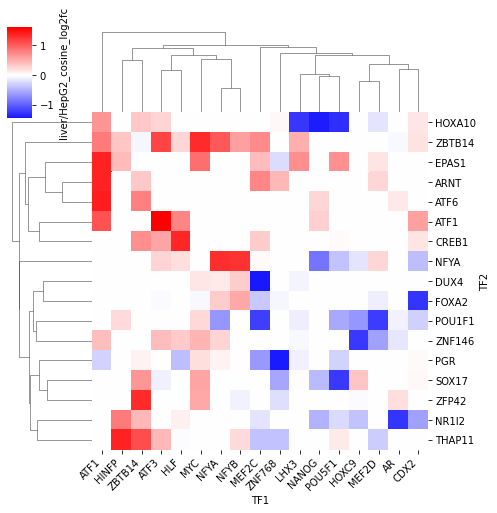

In [6]:
compare_objliver_hepG2.plot_heatmap()

INFO: Selecting rules for contrast: ('liver', 'HepG2')
INFO: measure_threshold is None; trying to calculate optimal threshold
INFO: mean_threshold is None; trying to calculate optimal threshold
INFO: Creating subset of rules using thresholds


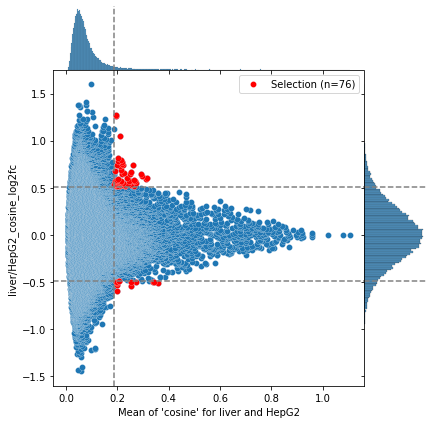

In [13]:
selectionliver_hepG2 = compare_objliver_hepG2.select_rules()

INFO: Finished! The network is found within <CombObj>.network.


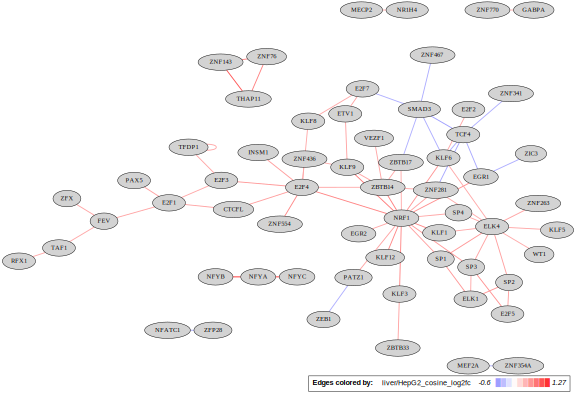

In [14]:
selectionliver_hepG2.plot_network()

In [15]:
selectionliver_hepG2.rules.head(10)

,TF1,TF2,liver_cosine,HepG2_cosine,liver/HepG2_cosine_log2fc,liver/HepG2_cosine_log2fc_pvalue
TCF4-SMAD3,TCF4,SMAD3,0.147882,0.245440,-0.600718,0.000000e+00
ZNF281-TCF4,ZNF281,TCF4,0.197742,0.307071,-0.543907,9.772347e-03
EGR1-TCF4,EGR1,TCF4,0.155905,0.243823,-0.532539,1.883772e-02
ZFP28-NFATC1,ZFP28,NFATC1,0.154991,0.238810,-0.513636,1.154707e-204
SMAD3-ZNF467,SMAD3,ZNF467,0.288889,0.428411,-0.508856,1.179881e-09
KLF6-SMAD3,KLF6,SMAD3,0.271755,0.402765,-0.504745,2.864731e-02
ZNF354A-MEF2A,ZNF354A,MEF2A,0.153544,0.234883,-0.503935,0.000000e+00
TCF4-KLF6,TCF4,KLF6,0.218027,0.325870,-0.502145,2.576389e-02
EGR1-ZIC3,EGR1,ZIC3,0.157045,0.239267,-0.500952,8.210654e-03
TCF4-ZNF341,TCF4,ZNF341,0.201640,0.301100,-0.495577,1.050456e-12


In [16]:
selectionliver_hepG2.rules.tail(10)


,TF1,TF2,liver_cosine,HepG2_cosine,liver/HepG2_cosine_log2fc,liver/HepG2_cosine_log2fc_pvalue
E2F4-ZNF554,E2F4,ZNF554,0.256160,0.136943,0.739787,0.052777
KLF12-NRF1,KLF12,NRF1,0.285885,0.154061,0.744821,0.058117
NRF1-E2F4,NRF1,E2F4,0.281448,0.150335,0.752932,0.094384
ZNF76-ZNF143,ZNF76,ZNF143,0.284489,0.148827,0.777887,0.007200
ZNF76-THAP11,ZNF76,THAP11,0.267965,0.138235,0.785552,0.006483
ZBTB14-NRF1,ZBTB14,NRF1,0.283092,0.146176,0.791968,0.160537
KLF9-NRF1,KLF9,NRF1,0.269515,0.135244,0.817043,0.031995
THAP11-ZNF143,THAP11,ZNF143,0.297497,0.121948,1.054680,0.000323
NFYC-NFYA,NFYC,NFYA,0.289271,0.096983,1.259093,0.006699
NFYB-NFYA,NFYB,NFYA,0.291845,0.096740,1.272830,0.004871


## Biological meaning 

-> nach Änderung von Plot, sind die TF TF co occurences teil snicht merh signifikant im plot drinne..

MYC-ZBTB14: Zinc finger and BTB domain-containing protein 14; Transcriptional activator of the dopamine transporter (DAT),binding it's promoter at the consensus sequence 5'- CCTGCACAGTTCACGGA-3'. Binds to 5'-d(GCC)(n)-3 trinucleotide repeats in promoter regions and acts as a repressor of the FMR1 gene. Transcriptional repressor of MYC and thymidine kinase promoters. The MYC oncogene contributes to the genesis of many human cancers. Myc proto-oncogene protein; Transcription factor that binds DNA in a non-specific manner, yet also specifically recognizes the core sequence 5'- CAC[GA]TG-3'. Activates the transcription of growth-related genes. MYC is documented to be involved broadly in many cancers, in which its expression is estimated to be elevated or deregulated in up to 70% of human cancers. High levels of MYC expression have been linked to aggressive human prostate cancer and triple-negative breast cancer.
-> tf cooccurence happens significantly more often in normal liver cells than in hepG2 cells. Makes sense since ZBTB14 is a repressor for MYC, which occurs more often in cancer.

MEF2C-DUX4: Transcription factor that is selectively and transiently expressed in cleavage-stage embryos. DUX is normally expressed in the testes, thymus, and cleavage-stage embryos ?? Overexpression of DUX4 due to translocations can cause B-cell leukemia. A translocation that merges DUX4 with CIC can cause an aggressive type of sarcoma
-> cooccurence is more often in HepG2, can be caused because of cancer abilitiy of HEPG2 cells

NANOG-HOXA10: NANOG transcription regulator involved in inner cell mass and embryonic stem (ES) cells proliferation and self-renewal. Imposes pluripotency on ES cells and prevents their differentiation towards extraembryonic endoderm and trophectoderm lineages. When overexpressed, promotes cells to enter into S phase and proliferation. NANOG is highly expressed in cancer stem cells and may thus function as an oncogene to promote carcinogenesis. High expression of NANOG correlates with poor survival in cancer patients. HOXA10 Expression of these proteins is spatially and temporally regulated during embryonic development. This gene is part of the A cluster on chromosome 7 and encodes a DNA-binding transcription factor that may regulate gene expression, morphogenesis, and differentiation.
-> cooccurence is more often in HepG2, can be caused because of cancer abilitiy of HEPG2 cells

POU5F1-HOXA10: POU5F1 this gene encodes a transcription factor containing a POU homeodomain that plays a key role in embryonic development and stem cell pluripotency. Aberrant expression of this gene in adult tissues is associated with tumorigenesis.
-> tf already found together
